<a href="https://colab.research.google.com/github/Jose-Balocchi/Proyecto2---Music-Guess/blob/main/20_Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternativa 1: Predicción de género musical

1) Fuente de datos

https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre

2) Breve descripción de datos

El dataset entrega una serie de caracteristicas de canciones incluyendo el genero musical, artista y nombre de cancion y otras caracteristicas mas tecnicas.

3) ¿Cuál es el objetivo?

El objetivo será determinar el genero musical de una cancion en base a las caracteristicas del dataset. Otra alternativa puede ser que en base a las caracteristicas se pueda determinar el nombre del artista, pero eso dependera de la cantidad de canciones por artista que podamos encontrar.

4) ¿Este es un problema de clasificación o regresión?

De clasificación.

5) ¿Cuántas características hay?

18

6) ¿Cuántas filas de datos hay?

50.000

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

Si por ejemplo queremos predecir el artista en base a las caracteristicas de las canciones vamos a necesitar hacer sub grupos de datos, por ej de musica clasica y asi poder identificar al autor (Mozart, Bach, etc).

Dado lo anterior, este tambien seria un modelo multiclase.

In [248]:
# Vamos con los modelos y bibliotecas

import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Herramientas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluacion modelos
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

from sklearn import set_config
set_config(display='diagram')

In [249]:
df= pd.read_csv('/content/music_genre.csv')
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [251]:
# Podemos ver que practicamente no hay valores nulos. De esos valores sólo eliminaremos las filas correspondientes a nuestra variable objetivo music genre

In [252]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [253]:
# Ahora veamos si hay datos duplicados

df.duplicated().sum()

4

In [254]:
# Eliminiaremos los datos duplicados

df = df.drop_duplicates()

In [255]:
df.duplicated().sum()

0

In [256]:
df = df.dropna(subset = ['music_genre'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [257]:
# Tambien podemos ver que hay muchas columnas que debieran ser float y aparecen como object.

In [258]:
df['danceability'].value_counts()

0.5290    143
0.6570    139
0.6100    134
0.5540    133
0.4990    130
         ... 
0.0996      1
0.0846      1
0.0737      1
0.0817      1
0.0954      1
Name: danceability, Length: 1088, dtype: int64

In [259]:
df['instrumentalness'].value_counts()

0.000000    15001
0.898000       70
0.902000       69
0.897000       66
0.912000       66
            ...  
0.000049        1
0.000876        1
0.000094        1
0.000787        1
0.000926        1
Name: instrumentalness, Length: 5131, dtype: int64

In [260]:
df['loudness'].value_counts()

-5.443     19
-7.066     17
-5.133     17
-5.982     16
-5.013     16
           ..
-0.670      1
-2.735      1
-2.372      1
-9.518      1
-13.652     1
Name: loudness, Length: 17247, dtype: int64

In [261]:
df['speechiness'].value_counts()

0.0332    173
0.0337    155
0.0315    153
0.0329    152
0.0362    148
         ... 
0.7950      1
0.7080      1
0.6830      1
0.8590      1
0.8550      1
Name: speechiness, Length: 1337, dtype: int64

In [262]:
df['valence'].value_counts()

0.3380    100
0.3240     95
0.3320     93
0.3510     91
0.3700     87
         ... 
0.0931      1
0.0576      1
0.0247      1
0.9900      1
0.0292      1
Name: valence, Length: 1615, dtype: int64

In [263]:
df['tempo'].value_counts()

?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
100.014                 15
                      ... 
137.046                  1
136.378                  1
93.041                   1
113.98200000000001       1
99.20100000000001        1
Name: tempo, Length: 29394, dtype: int64

In [264]:
# Aca podemos ver que la variable tempo tiene 4980 valores nulos. 

In [265]:
# Veamos los valores unicos por categoria para ver si las columnas son o no utiles

df.nunique()

instance_id         50000
artist_name          6863
track_name          41699
popularity             99
acousticness         4193
danceability         1088
duration_ms         26028
energy               2085
instrumentalness     5131
key                    12
liveness             1646
loudness            17247
mode                    2
speechiness          1337
tempo               29394
obtained_date           5
valence              1615
music_genre            10
dtype: int64

In [266]:
# Eliminare la columna tempo, ya que tiene muchos valores nulos y unicos. Tambien eliminare la columna de la fecha, instance id y track name y artist que tienen muchos valores unicos

df = df.drop(['tempo', 'instance_id', 'obtained_date', 'track_name', 'artist_name'], axis = 1 )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   key               50000 non-null  object 
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   mode              50000 non-null  object 
 10  speechiness       50000 non-null  float64
 11  valence           50000 non-null  float64
 12  music_genre       50000 non-null  object 
dtypes: float64(10), object(3)
memory usage: 5.3+ MB


In [267]:
df[['danceability', 'instrumentalness', 'loudness', 'speechiness', 'valence']] = df[['danceability', 'instrumentalness', 'loudness', 'speechiness', 'valence']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   key               50000 non-null  object 
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   mode              50000 non-null  object 
 10  speechiness       50000 non-null  float64
 11  valence           50000 non-null  float64
 12  music_genre       50000 non-null  object 
dtypes: float64(10), object(3)
memory usage: 5.3+ MB


In [268]:
# Revisemos las variables categoricas

In [269]:
df['key'].value_counts()

G     5727
C     5522
C#    5405
D     5265
A     4825
F     4341
B     3789
E     3760
A#    3356
G#    3319
F#    3101
D#    1590
Name: key, dtype: int64

In [270]:
df['mode'].value_counts()

Major    32099
Minor    17901
Name: mode, dtype: int64

In [271]:
df['music_genre'].value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

In [272]:
# Las variables categoricas estan ok

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   key               50000 non-null  object 
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   mode              50000 non-null  object 
 10  speechiness       50000 non-null  float64
 11  valence           50000 non-null  float64
 12  music_genre       50000 non-null  object 
dtypes: float64(10), object(3)
memory usage: 5.3+ MB


In [274]:
df.shape

(50000, 13)

In [275]:
# Hay correlaciones pero no muy fuertes con la variable objetivo.

<Axes: >

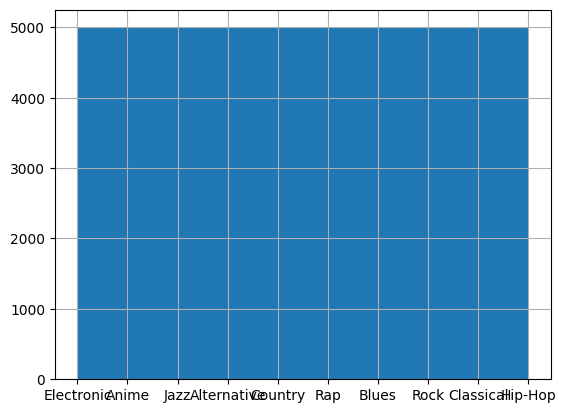

In [276]:

df['music_genre'].hist()

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'valence'}>, <Axes: >, <Axes: >]],
      dtype=object)

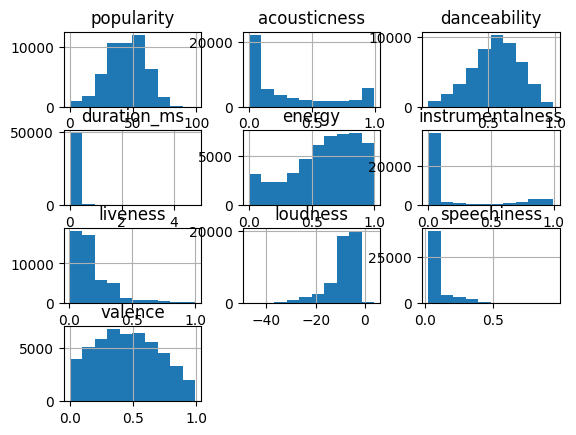

In [277]:
df.hist()

In [278]:
# Pendiente, ajustar size de histogramas

In [279]:
df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'valence', 'music_genre'],
      dtype='object')

In [280]:
# Comparemos el genero con popularidad

grafico_gen_pop = df.groupby(['music_genre'])['popularity'].mean().sort_values(ascending = False)
grafico_gen_pop = grafico_gen_pop.reset_index()
grafico_gen_pop


,music_genre,popularity
0,Rap,60.4974
1,Rock,59.6412
2,Hip-Hop,58.3996
3,Alternative,50.2242
4,Country,46.0100
5,Jazz,40.9286
6,Electronic,38.1118
7,Blues,34.8040
8,Classical,29.3158
9,Anime,24.2716


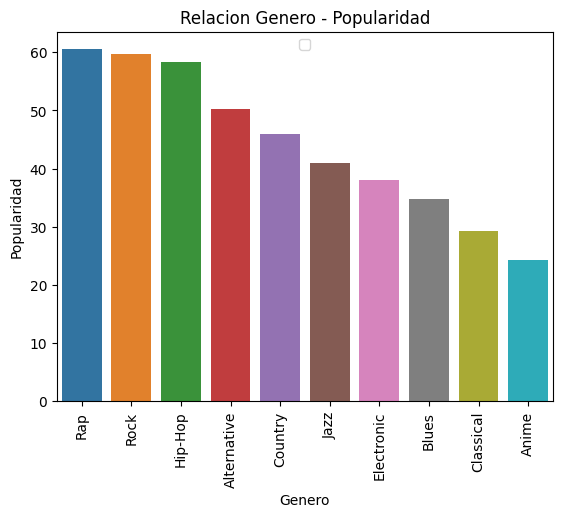

In [281]:
# Grafiquemos algunas relaciones


sns.barplot(x = grafico_gen_pop['music_genre'], y = grafico_gen_pop['popularity'])
plt.title('Relacion Genero - Popularidad')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper center')
plt.xlabel('Genero')
plt.ylabel('Popularidad')
plt.show()


In [282]:
# Comparemos el genero con danceability

grafico_gen_pop1 = df.groupby(['music_genre'])['danceability'].mean().sort_values(ascending = False)
grafico_gen_pop1 = grafico_gen_pop1.reset_index()


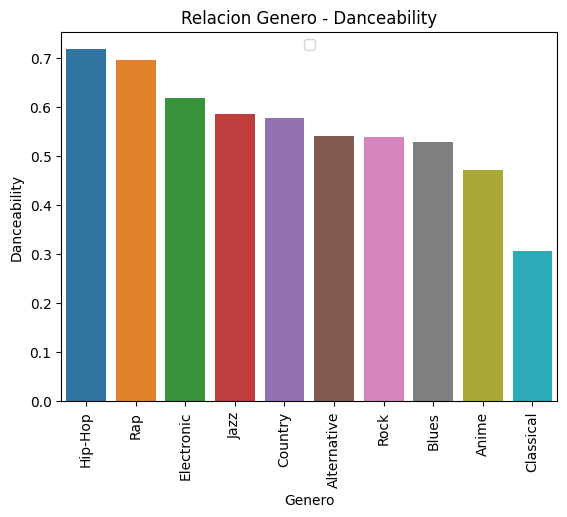

In [283]:
sns.barplot(x = grafico_gen_pop1['music_genre'], y = grafico_gen_pop1['danceability'])
plt.title('Relacion Genero - Danceability')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper center')
plt.xlabel('Genero')
plt.ylabel('Danceability')
plt.show()

In [284]:
# Comparemos el genero con instrumentalness

grafico_gen_pop2 = df.groupby(['music_genre'])['instrumentalness'].mean().sort_values(ascending = False)
grafico_gen_pop2 = grafico_gen_pop2.reset_index()

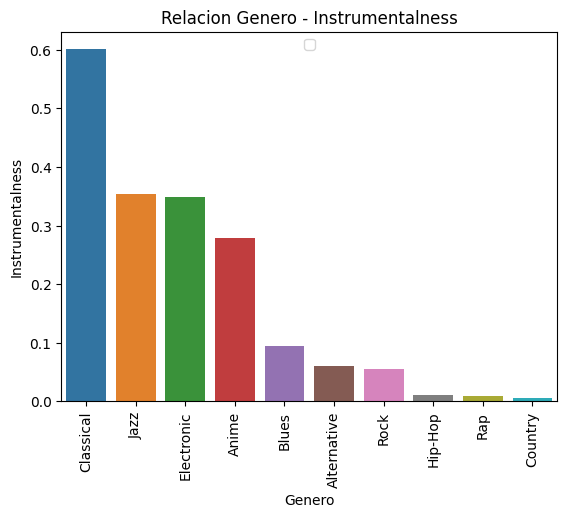

In [285]:
sns.barplot(x = grafico_gen_pop2['music_genre'], y = grafico_gen_pop2['instrumentalness'])
plt.title('Relacion Genero - Instrumentalness')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper center')
plt.xlabel('Genero')
plt.ylabel('Instrumentalness')
plt.show()

In [286]:
# Por ultimo categorizaremos nuestra variable objetivo

df['music_genre'] = df['music_genre'].map({'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative' : 3, 'Country' : 4, 'Rap' : 5, 'Blues' : 6, 'Rock': 7, 'Classical' : 8, 'Hip-Hop' :9})

In [287]:
df['music_genre'].value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: music_genre, dtype: int64

<ipython-input-288-0b2e043a4c8d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

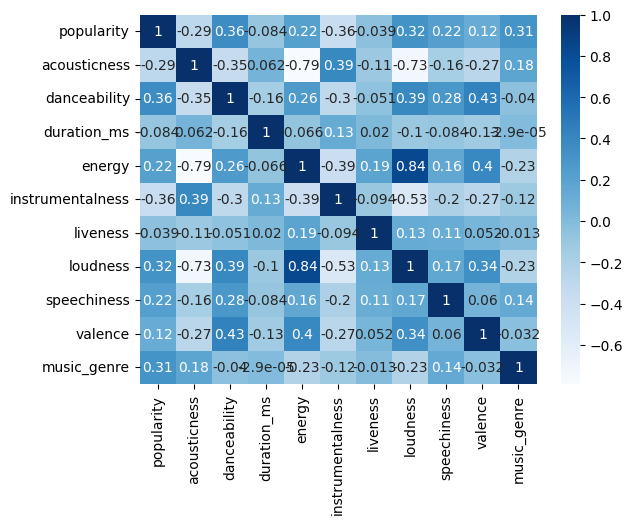

In [288]:
# Veamos ahora un mapa de calor con la variable ya numerica

corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

In [289]:
df['music_genre'] = df['music_genre'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   key               50000 non-null  object 
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   mode              50000 non-null  object 
 10  speechiness       50000 non-null  float64
 11  valence           50000 non-null  float64
 12  music_genre       50000 non-null  float64
dtypes: float64(11), object(2)
memory usage: 5.3+ MB
